In [274]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [275]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

### Import issues

In [276]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

We filter only issues in the timeframe in which the project was using TravisCI

### Import versions

In [277]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import fixVersions

In [278]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import labels

In [279]:
labels = pd.read_csv(f"{csv_folder}/issues_labels.csv", index_col=0)
labels.head()

,issue_id,label
0,98118,compute_engine
1,98118,governance
2,98118,web_api
3,98084,hardening
4,98084,usability-testing-findings


### Import subtasks

In [280]:
substaks = pd.read_csv(f"{csv_folder}/issues_subtasks.csv", index_col=0)
substaks.head()

,issue_id,subtask_key,subtask_id
0,97393,SONAR-13858,97372
1,97393,SONAR-13868,97394
2,97387,SONAR-13863,97388
3,97387,SONAR-13864,97389
4,97387,SONAR-13865,97390


## Analysis

### Shape

In [281]:
issues.shape

(5779, 108)

In [282]:
fixversions.shape

(8519, 3)

In [283]:
versions.shape

(3335, 3)

In [284]:
labels.shape

(2983, 2)

In [285]:
substaks.shape

(851, 3)

### Columns

In [286]:
issues.columns

Index(['issue_key', 'issue_id', 'issuetype', 'customfield_12130',
       'customfield_11041', 'customfield_12132', 'customfield_12131',
       'project', 'customfield_12134', 'customfield_12530',
       ...
       'assignee_name', 'reporter_key', 'reporter_name', 'creator_key',
       'creator_name', 'status_id', 'status_name', 'resolution_id',
       'resolution_name', 'votes_votes'],
      dtype='object', length=108)

In [287]:
versions.columns

Index(['issue_id', 'version_name', 'version_id'], dtype='object')

In [288]:
fixversions.columns

Index(['issue_id', 'fixVersion_name', 'fixVersion_id'], dtype='object')

In [289]:
labels.columns

Index(['issue_id', 'label'], dtype='object')

In [290]:
substaks.columns

Index(['issue_id', 'subtask_key', 'subtask_id'], dtype='object')

We have four datasets, related to each other via the primary key "issue_id". They represent different aspects of the Jira issues and will therefore analyzed in combination.

### Preliminary analysis of issue fields
We analyse the fields with no clear name or description in order to decide whether to keep them or exclude them from the analysis.

In [291]:
customfields = [col for col in issues.columns if col.startswith("customfield")]
len(customfields)

65

There are 65 customfields for which are not Jira default fields and have been defined by the project admins. We do not have descriptions for them. We let pandas describe them and manually select the ones which appear to possibly be useful to our analysis

In [292]:
issues[customfields].describe(include = ['O'])

,customfield_12130,customfield_11041,customfield_12132,customfield_12134,customfield_12133,customfield_12136,customfield_12135,customfield_12138,customfield_12137,customfield_11631,customfield_11038,customfield_10930,customfield_10931,customfield_10932,customfield_12034,customfield_12430,customfield_11930,customfield_11730,customfield_12536,customfield_10437,customfield_10438
count,899,5779,899,899,899,899,899,899,899,2005,2,0,0,0,1058,1,5779,108,99,5523,5779
unique,1,5779,1,1,1,1,1,1,1,35,2,0,0,0,1,1,1,3,1,3,1
top,P3-Medium,0|i02h7b:,No root cause identified,Not captured yet,Not assessed yet,Not captured yet,No action plan,Not captured yet,Not captured yet,None,MMF-1940,NaN,NaN,NaN,SonarQube,https://sonarsource.productboard.com/feature-b...,{},Minutes,New,,[]
freq,899,1,899,899,899,899,899,899,899,1971,1,NaN,NaN,NaN,1058,1,5779,57,99,4986,5779


We selected the ones which have more than only one unique value.
We selected the ones which have less unique values than all issues (otherwise it acts like a not informative id).
We further list their values here:

In [293]:
issues.customfield_10930.value_counts().head(10)

Series([], Name: customfield_10930, dtype: int64)

In [294]:
issues.customfield_10437.value_counts().head(10)

         4986
< 4.5     536
5.6         1
Name: customfield_10437, dtype: int64

In [295]:
issues.customfield_11730.value_counts().head(10)

Minutes    57
Hours      43
Days        8
Name: customfield_11730, dtype: int64

In [296]:
issues.customfield_11631.value_counts().head(5)

None                                                                                                                                                                                                                                                                                                                                                                                                    1971
Just after the deployment, the GitHub and Bitbucket applications must be updated : \n- SonarCloud GitHub application needs to be updated with new setup url : https://sonarcloud.io/create-organization\n- SonarCloud GitHub application needs to be updated to request new permission "Organization members : Read"\n- SonarCloud Bitbucket application needs to be updated on Bitbucket Cloud side       1
After blue/green deployment, the Elasticsearch indices "rules" and "issues" must be re-indexed by calling: \ncurl -XPOST -H "X-Sonar-Passcode: xxxx" https://server/api/system/migrate_es\n\nThat implies to d

By filtering only customfields with more than 1 unique value and less unique values than the number of issues we obtained 4 to further analyze.
The three customfields which have been analysed did not clearly show their meaning and are therefore not included in the analysis.

In [297]:
columns_to_ignore = ["fixVersions", "issuelinks", "versions", "subtasks", "components", "labels", "watches"]

We also ignore the columns containing complex objects which we have mapped to a separate dataframe (except *watches*, *components* and *issuelinks*)

In [298]:
focus_columns = set(issues.columns) - set(customfields) - set(columns_to_ignore)
len(focus_columns)

36

### Describe

In [299]:
issues = issues[focus_columns]

In [300]:
issues.describe()

,votes,votes_votes,priority_id,issuetype_id,workratio,resolution_id,issue_id,status_id
count,5779.000000,5779.000000,5779.000000,5779.000000,5779.0,5214.000000,5779.000000,5779.000000
mean,0.170964,0.170964,3.051566,3.251255,-1.0,130.734944,65170.063852,52.236027
std,0.933130,0.933130,0.296113,1.381351,0.0,1144.406832,18123.937562,681.697087
min,0.000000,0.000000,1.000000,1.000000,-1.0,1.000000,26987.000000,1.000000
25%,0.000000,0.000000,3.000000,2.000000,-1.0,1.000000,50797.000000,6.000000
50%,0.000000,0.000000,3.000000,4.000000,-1.0,1.000000,63586.000000,6.000000
75%,0.000000,0.000000,3.000000,4.000000,-1.0,1.000000,80710.000000,6.000000
max,47.000000,47.000000,5.000000,6.000000,-1.0,10601.000000,97898.000000,10002.000000


In [301]:
issues.describe(include = ['O'])

,issuetype_name,priority,environment,resolution_name,assignee_key,resolution,issue_key,reporter,creator_key,project,creator,creator_name,edition,reporter_name,reporter_key,status,status_name,priority_name,issuetype,assignee,summary,assignee_name,description
count,5779,5779,8,5214,4593,5214,5779,5779,5779,5779,5779,5779,2315,5779,5779,5779,5779,5779,5779,4593,5779,4593,5036
unique,6,5,8,11,55,11,5779,79,78,1,78,78,5,79,79,7,7,5,6,55,5758,55,4991
top,Improvement,Major,Win 7 (out of requirement),Fixed,stas.vilchik,Fixed,SONAR-13188,Stas Vilchik,stas.vilchik,SONAR,Stas Vilchik,stas.vilchik,Community,stas.vilchik,stas.vilchik,Closed,Closed,Major,Improvement,Stas Vilchik,Upgrade code analyzers to latest released vers...,stas.vilchik,Template names are unique by organization. Con...
freq,3150,5380,1,4443,698,4443,1,781,815,5779,815,815,1869,781,781,5202,5202,5380,3150,698,10,698,8


* Workratio seems to be not used much as 75% percentile is -1
* Votes has 75% percentile to 0 (most of the issues did not get votes) but has also a value of 192
* There are 6 issuetypes
* There are 7 statuses
* Some fields represent the same information:
    * issuetype_name and issuetype
    * assignee_key and assignee_name
    * creator_key and creator
    * resolution and resolution_name
    * priority_name and priority
    * reporter_key and reporter
    
We therefore safely remove one of each columns and keep the one in the more human readable form

In [302]:
duplicated_columns = ["issuetype", "assignee_key", "creator_key", "resolution", "priority", "reporter_key", "resolution_id"]

In [303]:
issues = issues[set(issues.columns) - set(duplicated_columns)]

In [304]:
fixversions.describe()

,issue_id,fixVersion_id
count,8519.000000,8519.000000
mean,48539.681418,12878.145557
std,21349.658119,1409.572044
min,26471.000000,11524.000000
25%,29577.500000,11600.000000
50%,42895.000000,12781.000000
75%,64170.000000,14014.000000
max,97864.000000,16435.000000


In [305]:
versions.describe()

,issue_id,version_id
count,3335.000000,3335.000000
mean,40027.932834,12169.017091
std,18698.712548,1127.057544
min,26470.000000,11523.000000
25%,28845.000000,11556.000000
50%,30915.000000,11584.000000
75%,45677.500000,11647.000000
max,97777.000000,16404.000000


In [306]:
labels.describe()

,issue_id
count,2983.000000
mean,60033.104593
std,15994.760287
min,26487.000000
25%,51106.500000
50%,58705.000000
75%,65826.500000
max,98118.000000


In [307]:
substaks.describe()

,issue_id,subtask_id
count,851.000000,851.000000
mean,45203.332550,46077.115159
std,20054.718815,20040.685090
min,26567.000000,26526.000000
25%,29310.000000,29334.500000
50%,32147.000000,39324.000000
75%,61027.000000,61197.500000
max,97393.000000,97553.000000


We do not detect anomalies in the statistical summaries of the other datasetsm

### Missing values

In [308]:
issues.isna().sum().sort_values(ascending=False).head(15)

lastViewed         5779
environment        5771
edition            3464
duedate            1535
assignee           1186
assignee_name      1186
description         743
resolutiondate      565
resolution_name     565
creator               0
votes                 0
votes_votes           0
priority_id           0
issue_key             0
reporter              0
dtype: int64

In [309]:
fixversions.isna().sum()

issue_id           0
fixVersion_name    0
fixVersion_id      0
dtype: int64

In [310]:
versions.isna().sum()

issue_id        0
version_name    0
version_id      0
dtype: int64

In [311]:
labels.isna().sum()

issue_id    0
label       0
dtype: int64

In [312]:
substaks.isna().sum()

issue_id       0
subtask_key    0
subtask_id     0
dtype: int64

* There are missing values only in the issues dataset
* All fields presenting missing values are fields which are optional in an issue. We therefore not worry about their absence even though that has to be taken into account when working with those fields.

## In depth analysis

### Workratio

In [313]:
issues.workratio.value_counts()

-1    5779
Name: workratio, dtype: int64

As seen in the statistical summary, this field seems to not be used often. It should represent a percentage of the expected work, but most of the entries have the negative value -1. We therefore decide to ignore this field.

In [314]:
issues = issues[set(issues.columns) - set(["workratio"])]

In [315]:
len(issues.columns)

28

### IssueType

In [316]:
issues.issuetype_name.unique()

array(['Task', 'Improvement', 'New Feature', 'Bug', 'Documentation',
       'Sub-task'], dtype=object)

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

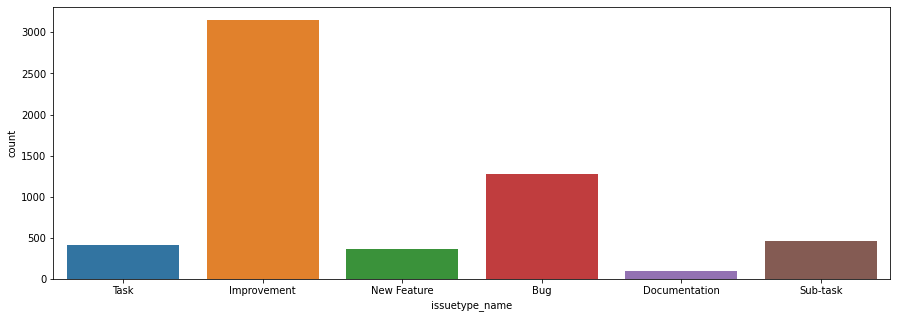

In [317]:
sns.countplot(x="issuetype_name", data=issues[["issue_id", "issuetype_name"]])

In [318]:
issues.issuetype_name.value_counts(normalize=True)

Improvement      0.545077
Bug              0.221319
Sub-task         0.080637
Task             0.071985
New Feature      0.063852
Documentation    0.017131
Name: issuetype_name, dtype: float64

* We see that issues can only have one of these 6 issue types.
* 54% is Improvement, followed by 22% Bug

In [319]:
issues["created_month"] = issues.created.dt.month
issues["created_year"] = issues.created.dt.year

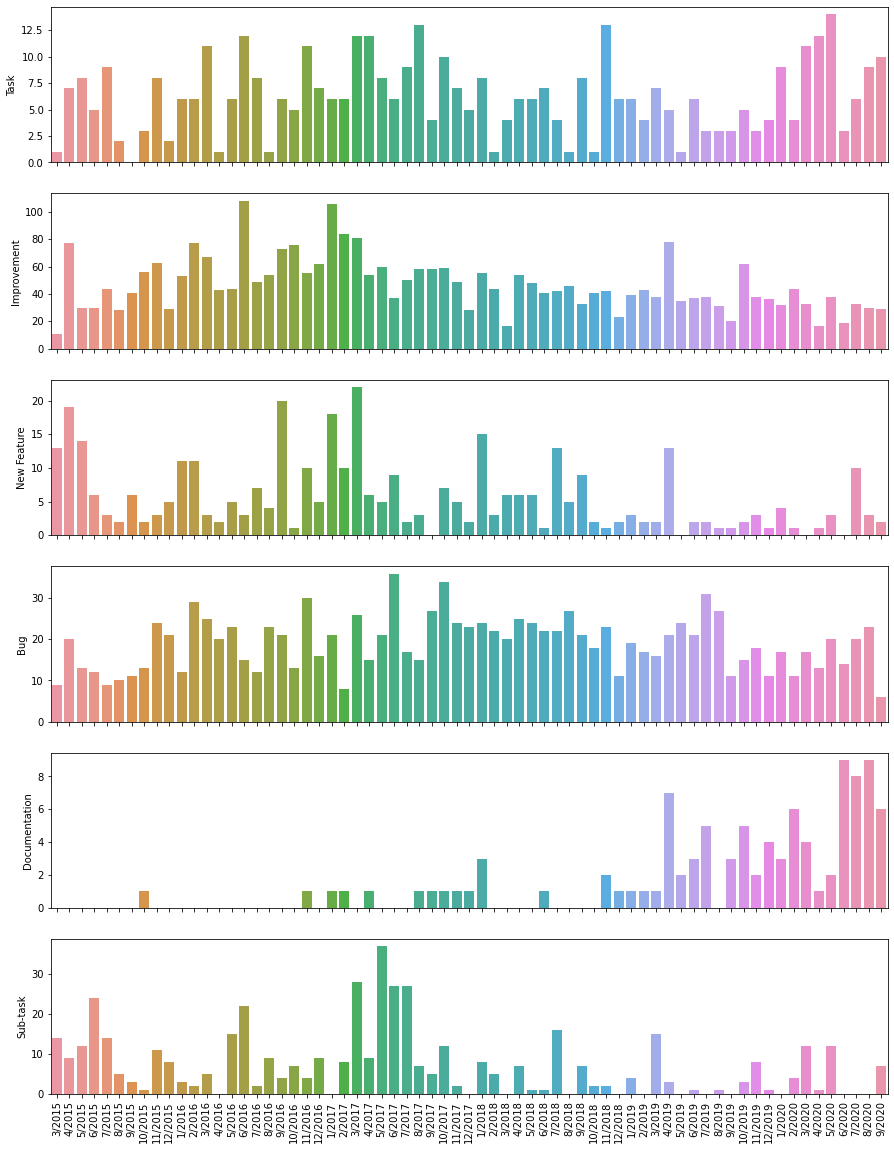

In [320]:
time_group = ["created_year", "created_month"]
f, axes = plt.subplots(len(issues.issuetype_name.unique()),1, figsize=(15,20), sharex=True)
x = issues.groupby(time_group+["issuetype_name"]).size().unstack(fill_value=0).reset_index()
for i, issuetype in enumerate(issues.issuetype_name.unique()):
    ax = sns.barplot(x=x.index, y=x[issuetype], ax=axes[i])
    ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
    ax.set_ylabel(issuetype)

* New Feature, Improvement and Sub-task have decresed in number over time
* Documentation has increased after 1/2019
* Bug has been quite consistent

To note that the y-axis is not the same for the different plots. We are interested in seeing their trend overtime and using the same axis would penalize the types with fewer observations. 

### Resolution

In [321]:
issues.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub',
       'Incomplete', 'Not A Bug'], dtype=object)

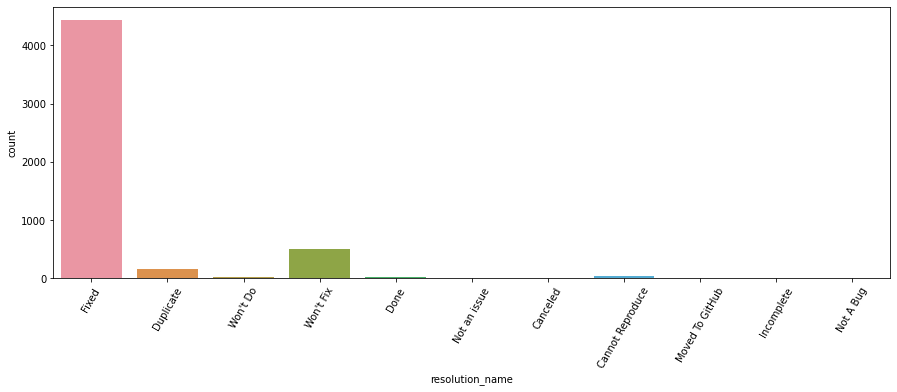

In [322]:
ax = sns.countplot(x="resolution_name", data=issues[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

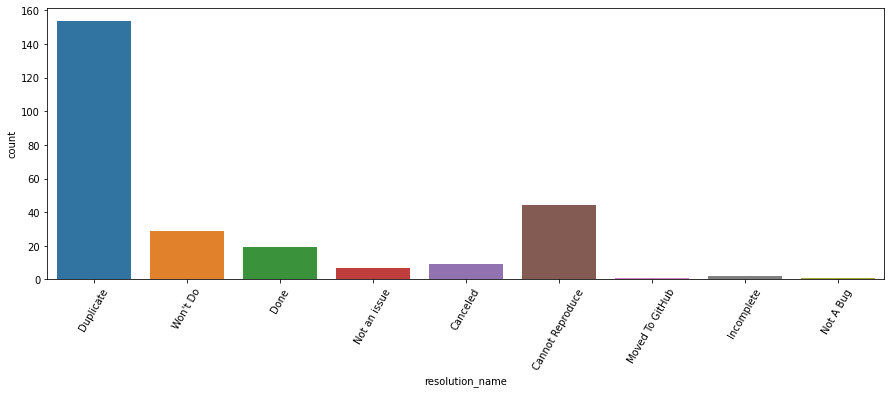

In [323]:
ax = sns.countplot(issues[~(issues.resolution_name == "Fixed") & ~(issues.resolution_name == "Won't Fix")].resolution_name)
ax.tick_params(axis='x', labelrotation= 60)

In [324]:
issues.resolution_name.value_counts(normalize=True)

Fixed               0.852129
Won't Fix           0.096855
Duplicate           0.029536
Cannot Reproduce    0.008439
Won't Do            0.005562
Done                0.003644
Canceled            0.001726
Not an issue        0.001343
Incomplete          0.000384
Moved To GitHub     0.000192
Not A Bug           0.000192
Name: resolution_name, dtype: float64

* 85% of the resolution are Fixed
* 3% are duplicates (may need to be removed)

### Priority

In [325]:
issues.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

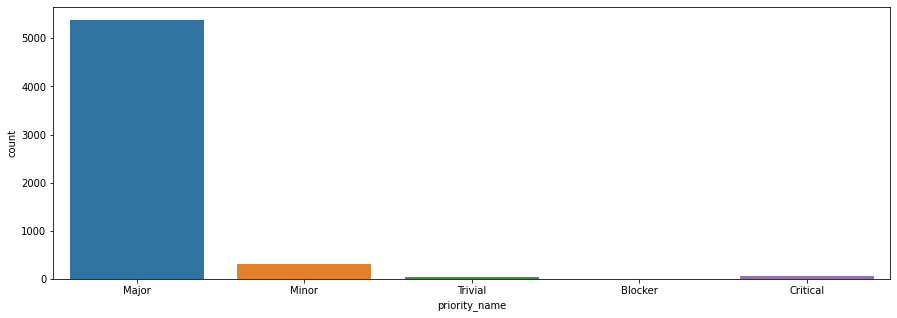

In [326]:
ax = sns.countplot(x="priority_name", data=issues[["issue_id", "priority_name"]])

In [327]:
issues.priority_name.isna().sum()

0

In [328]:
issues.priority_name.value_counts(normalize=True)

Major       0.930957
Minor       0.052085
Critical    0.009863
Trivial     0.005883
Blocker     0.001211
Name: priority_name, dtype: float64

Every issue has a priority. With issue with Major priority representing the 93%

## Labels

In [329]:
labels_merge = labels.merge(issues, on="issue_id")

**Number of labels**

In [330]:
labels.label = labels.label.str.lower()
len(labels.label.unique())

192

**Number of issues with their number of labels**

<AxesSubplot:xlabel='label', ylabel='count'>

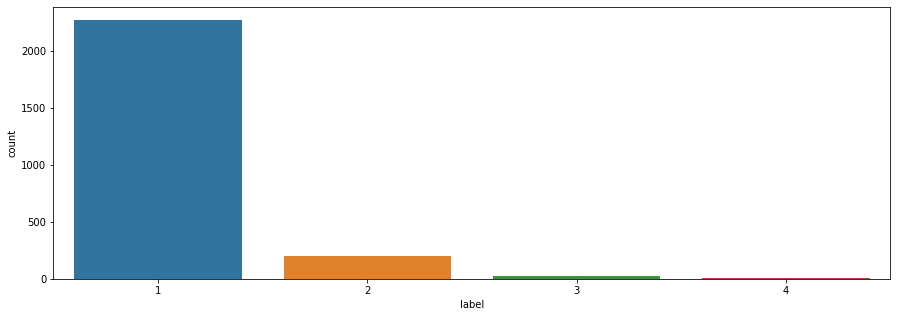

In [331]:
sns.countplot(labels_merge.groupby("issue_id").count().label)

**Top labels**

<AxesSubplot:>

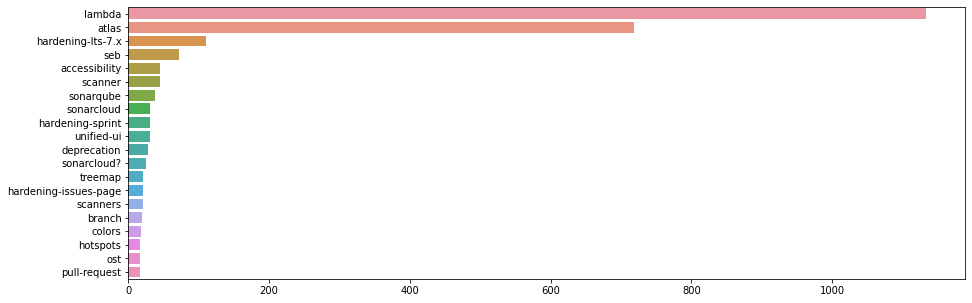

In [332]:
vals = labels.label.value_counts().head(20)
sns.barplot(x = vals.values, y=vals.index)

* Each issue has at least one label
* Lambda label seems to be the most popular ones by far

### Versions
We filter only the versions after the project moved to TravisCI

In [333]:
versions = versions[versions.version_name > "4.5.5"]
versions_merged = versions.merge(issues, on="issue_id")

In [334]:
versions.version_name.unique()

array(['8.4.2', '8.4', '7.9.4', '8.4.1', '7.9', '8.3.1', '8.3', '7.9.1',
       '7.9.2', '7.9.3', '8.0', '8.1', '7.7', '8.2', '7.8', '7.4',
       '6.7.7', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.0',
       '7.1', '7.2', '7.3', '7.5', '7.6', '6.7', '6.7.6', '6.7.5',
       '6.7.1', '6.7.4', '7.2.1', '5.6.3', '6.7.3', '5.6.7', '6.7.2',
       '5.6', '6.6-M1', '5.6.6', '6.3.1', '6.5-M1', '6.3.2', '5.6.4',
       '5.6.5', '5.5', '5.2', '5.6.1', '5.6.2', '6.1.1', '4.5.7', '5.4',
       '5.3', '4.5.6', '5.1.2', '5.0', '5.1', '5.1.1', '5.0.1',
       'DEV-MAVEN-PLUGIN-0.8 '], dtype=object)

In [335]:
len(versions.version_name.unique())

63

**Percentage of issues with a version**

In [336]:
len(versions.issue_id)/(len(issues.issue_id))*100

17.909672953798236

**Top versions**

In [337]:
top_versions = versions.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

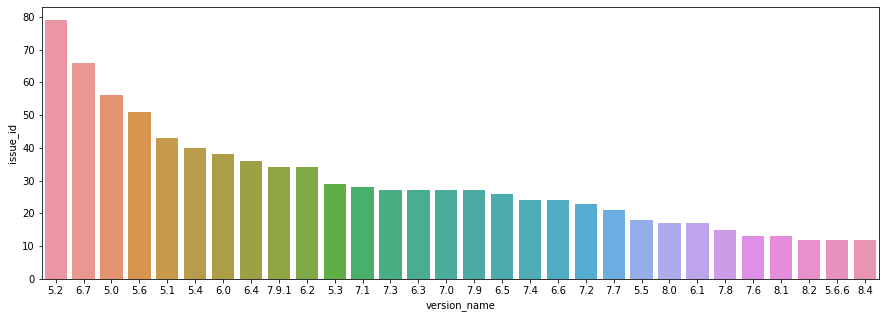

In [338]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(30))

In [339]:
top_versions.head(10).version_name.values

array(['5.2', '6.7', '5.0', '5.6', '5.1', '5.4', '6.0', '6.4', '7.9.1',
       '6.2'], dtype=object)

**Distribution of issuetypes for each version**

In [340]:
versions_sorted = versions.sort_values(by="version_name").version_name.unique()

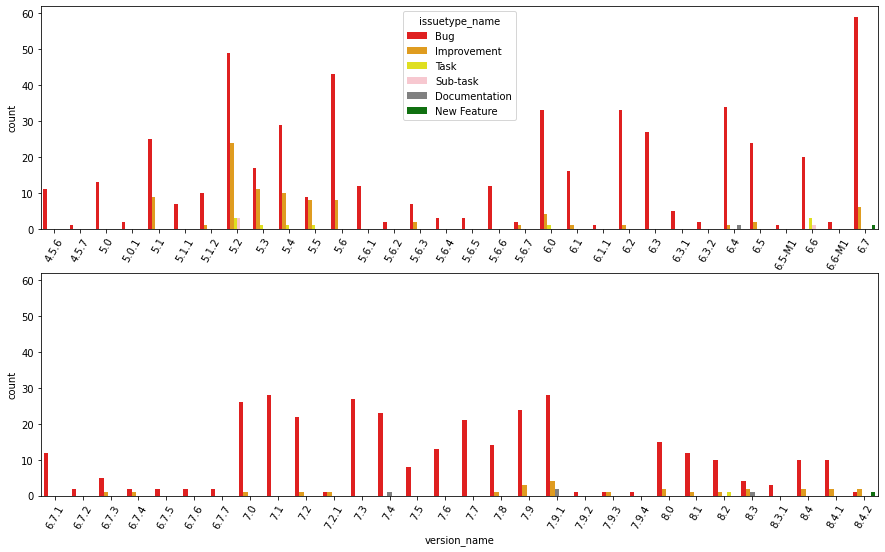

In [341]:
f, axes = plt.subplots(2,1, figsize=(15,9), sharey=True)
for i in range(2):
    data = versions_merged[versions_merged.version_name.isin(versions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Percentage of issuestype with a version**

<AxesSubplot:xlabel='issuetype', ylabel='percentage_of_issue_with_version'>

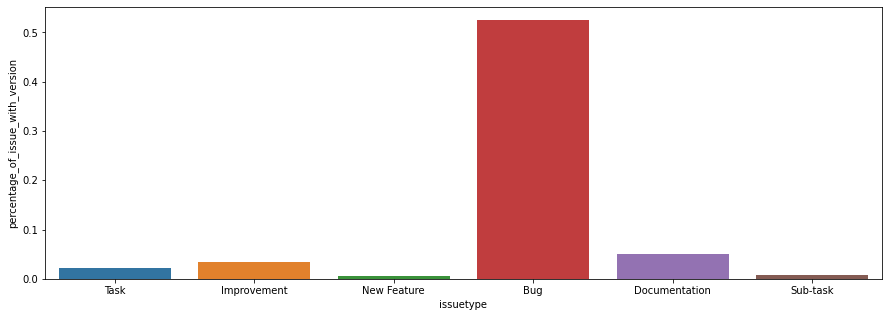

In [342]:
data = []
for issuetype in issues.issuetype_name.unique():
    data.append((issuetype, len(set(issues[issues.issuetype_name == issuetype].issue_id).intersection(set(versions.issue_id)))\
                 /len(issues[issues.issuetype_name == issuetype].issue_id)))
sns.barplot(x="issuetype", y="percentage_of_issue_with_version", data=pd.DataFrame(data, columns=["issuetype", "percentage_of_issue_with_version"]))

In [343]:
data

[('Task', 0.021634615384615384),
 ('Improvement', 0.03365079365079365),
 ('New Feature', 0.005420054200542005),
 ('Bug', 0.5254104769351056),
 ('Documentation', 0.050505050505050504),
 ('Sub-task', 0.008583690987124463)]

* We have 63 versions we can use for our Travis analysis
* Only 17% of issues have a version
* 52% of issues with type Bug have a version

## FixVersions

In [344]:
fixversions = fixversions[fixversions.fixVersion_name > "4.5.5"]
fixversions_merged = fixversions.merge(issues, on="issue_id")

In [345]:
fixversions.fixVersion_name.unique()

array(['8.5', '8.6', '8.4.2', '9.0', '8.4.1', '8.2', '8.4', '7.9.4',
       '8.3.1', '8.3', '7.9.3', '8.1', '7.9.2', '8.0', '7.9.1', '7.9',
       '7.8', '6.7.7', '7.7', '7.6', '7.5', '6.7.6', '7.4', '6.7.5',
       '7.3', '7.2.1', '7.2', '6.7.4', '7.1', '6.7.3', '6.7.2', '7.0',
       '6.7.1', '6.7', '6.6', '6.6-M3', '6.4', '6.6-M1', '6.6-M2',
       '5.6.7', '6.5', '6.5-M4', '6.5-M3', '6.3', '6.5-M2', '6.5-M1',
       '6.3.1', '6.3.2', '5.6.6', '5.6.5', '6.2', '6.2.1', '5.6.4',
       '6.1.1', '5.6.3', '6.1', '5.6.2', '6.0', '5.6.1', '5.6', '5.5',
       '4.5.7', '5.4', '5.3', '5.2', '4.5.6', '5.1.2', '5.1.1', '5.1',
       '5.0.1', '5.0', 'DEV-MAVEN-PLUGIN-0.9'], dtype=object)

In [346]:
len(fixversions.fixVersion_name.unique())

72

In [347]:
set(fixversions.fixVersion_name.unique()) - set(versions.version_name.unique())

{'6.2.1',
 '6.5-M2',
 '6.5-M3',
 '6.5-M4',
 '6.6-M2',
 '6.6-M3',
 '8.5',
 '8.6',
 '9.0',
 'DEV-MAVEN-PLUGIN-0.9'}

**Percentage of issues with a fixversion**

In [348]:
len(fixversions.issue_id)/(len(issues.issue_id))*100

92.0920574493857

**Top fixversions**

In [349]:
top_fixversions = fixversions.groupby("fixVersion_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)

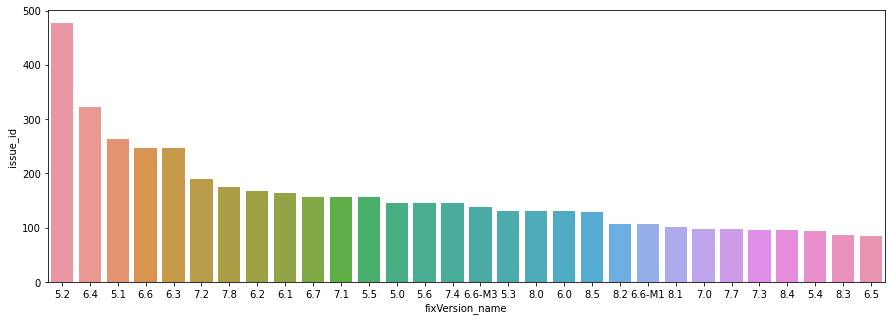

In [350]:
ax = sns.barplot(x="fixVersion_name", y="issue_id", data=top_fixversions[["issue_id", "fixVersion_name"]].head(30))

In [351]:
top_fixversions.head(10).fixVersion_name.values

array(['5.2', '6.4', '5.1', '6.6', '6.3', '7.2', '7.8', '6.2', '6.1',
       '6.7'], dtype=object)

**Distribution of issuetypes for each version**

In [352]:
fixversions_sorted = fixversions.sort_values(by="fixVersion_name").fixVersion_name.unique()

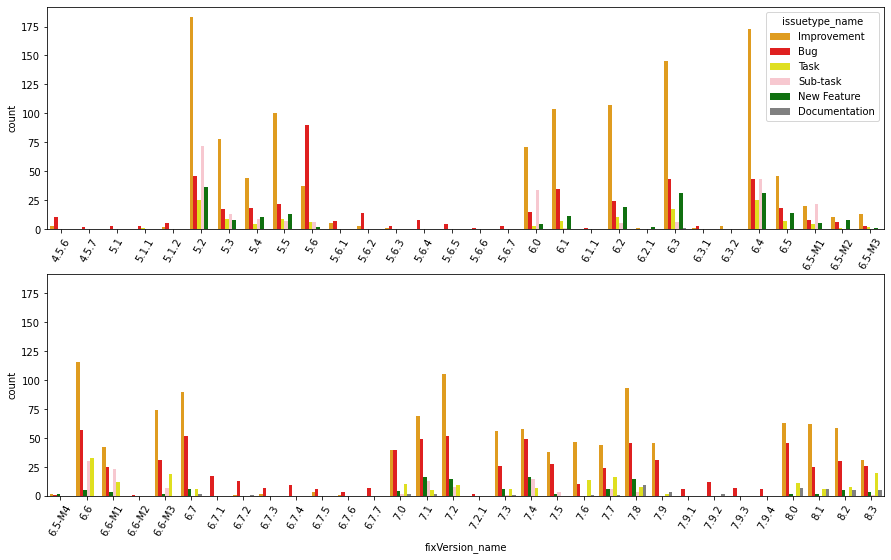

In [353]:
f, axes = plt.subplots(2,1, figsize=(15,9), sharey=True)
for i in range(2):
    data = fixversions_merged[fixversions_merged.fixVersion_name.isin(fixversions_sorted[32*i:32*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="fixVersion_name", 
                       hue="issuetype_name", data=data.sort_values(by="fixVersion_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

**Percentage of issuestype with a version**

<AxesSubplot:xlabel='issuetype', ylabel='percentage_of_issue_with_fixversion'>

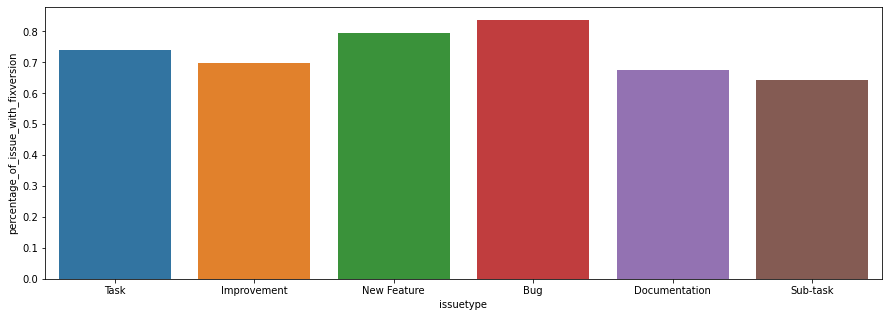

In [354]:
data = []
for issuetype in issues.issuetype_name.unique():
    issuetype_ids = issues[issues.issuetype_name == issuetype].issue_id
    data.append((issuetype, len(set(issuetype_ids).intersection(set(fixversions.issue_id)))\
                 /len(issuetype_ids)))
sns.barplot(x="issuetype", y="percentage_of_issue_with_fixversion", data=pd.DataFrame(data, columns=["issuetype", "percentage_of_issue_with_fixversion"]))

In [355]:
data

[('Task', 0.7403846153846154),
 ('Improvement', 0.6984126984126984),
 ('New Feature', 0.7940379403794038),
 ('Bug', 0.8373729476153244),
 ('Documentation', 0.6767676767676768),
 ('Sub-task', 0.6437768240343348)]

* We have 72 fix versions we can use for our Travis analysis (? more than versions)
* 92% of issues have a fixversion
* The issuetypes with most issues with a fixversion are Bug and New Feature

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [356]:
no_version_issues = issues[~issues.issue_id.isin(versions.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version

,status,issuetype_name,status_name,priority_name,lastViewed,votes,environment,votes_votes,issue_id,resolutiondate,resolution_name,duedate,priority_id,assignee,status_id,issue_key,summary,reporter,project,creator,issuetype_id,updated,assignee_name,creator_name,edition,created,description,reporter_name,created_month,created_year
35,Closed,Bug,Closed,Major,NaT,0,NaN,0,97392,2020-09-15 12:37:57+00:00,Fixed,NaT,3,Jacek Poreda,6,SONAR-13866,It should not be possible to use a description...,Julien Lancelot,SONAR,Julien Lancelot,1,2020-09-15 12:37:57+00:00,jacek.poreda,julien.lancelot,Enterprise,2020-09-09 08:44:19+00:00,When using {{api/views/add_sub_view}} with a d...,julien.lancelot,9,2020
43,Closed,Bug,Closed,Major,NaT,0,NaN,0,97360,2020-09-18 09:41:58+00:00,Fixed,2020-09-21 00:00:00+00:00,3,Jeremy Davis,6,SONAR-13857,Projects page - Security Review facet on new c...,Jacek Poreda,SONAR,Jacek Poreda,1,2020-09-18 09:41:58+00:00,jeremy.davis,jacek.poreda,Community,2020-09-08 07:52:57+00:00,Facet `Security Review` is not working while c...,jacek.poreda,9,2020
46,Open,Bug,Open,Major,NaT,0,NaN,0,97337,NaT,NaN,NaT,3,NaN,1,SONAR-13854,Identification of the plugin that created a ru...,Duarte Meneses,SONAR,Duarte Meneses,1,2020-09-04 22:20:07+00:00,NaN,duarte.meneses,Community,2020-09-04 22:18:18+00:00,All plugins extending a base plugin share the ...,duarte.meneses,9,2020
52,Closed,Bug,Closed,Major,NaT,0,NaN,0,97230,2020-09-04 13:22:54+00:00,Fixed,2020-09-10 00:00:00+00:00,3,Jeremy Davis,6,SONAR-13847,Project overview isn't refreshed after first a...,Jeremy Davis,SONAR,Jeremy Davis,1,2020-09-04 13:22:54+00:00,jeremy.davis,jeremy.davis,Community,2020-09-02 15:59:37+00:00,"When a new project is analyzed, the page is su...",jeremy.davis,9,2020
67,Closed,Bug,Closed,Major,NaT,0,NaN,0,97063,2020-08-28 14:35:24+00:00,Fixed,2020-09-03 00:00:00+00:00,3,Duarte Meneses,6,SONAR-13827,"New Code Period set to ""reference branch"" is n...",Duarte Meneses,SONAR,Duarte Meneses,1,2020-08-28 14:35:24+00:00,duarte.meneses,duarte.meneses,Community,2020-08-27 17:28:16+00:00,Due to a mistake implementing the new SCM API ...,duarte.meneses,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Closed,Bug,Closed,Major,NaT,0,NaN,0,29666,2017-03-23 16:31:55+00:00,Won't Fix,NaT,3,NaN,6,SONAR-6352,Impossible to update a filter using a removed ...,Julien Lancelot,SONAR,Julien Lancelot,1,2017-03-23 16:31:55+00:00,NaN,julien.lancelot,NaN,2015-03-30 05:49:41+00:00,Steps to reproduce : \n- Create a measure filt...,julien.lancelot,3,2015
5757,Closed,Bug,Closed,Major,NaT,0,NaN,0,29731,2015-04-15 07:07:05+00:00,Fixed,2015-04-10 00:00:00+00:00,3,Simon Brandhof,6,SONAR-6348,Property sonar.path.temp is ignored by Ruby on...,Simon Brandhof,SONAR,Simon Brandhof,1,2016-02-05 14:41:14+00:00,simon.brandhof,simon.brandhof,NaN,2015-03-27 03:50:25+00:00,Ruby on Rails temp files are written in defaul...,simon.brandhof,3,2015
5758,Closed,Bug,Closed,Major,NaT,0,NaN,0,27726,2015-09-25 09:54:07+00:00,Fixed,2015-09-25 00:00:00+00:00,3,Julien Lancelot,6,SONAR-6347,Increase max value of duplications_index id co...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-02-01 15:07:36+00:00,julien.lancelot,henryju,NaN,2015-03-27 02:55:20+00:00,When an instance contains too much data the cr...,henryju,3,2015
5769,Closed,Bug,Closed,Major,NaT,2,NaN,2,27851,2016-05-16 10:34:07+00:00,Fixed,2016-05-16 00:00:00+00:00,3,Stas Vilchik,6,SONAR-6336,Incorrect quality status when multiple conditi...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-05-17 08:04:51+00:00,stas.vilchik,henryju,NaN,2015-03-24 10:44:52+00:00,If several conditions are declared on the same...,henryju,3,2015


In [357]:
bug_no_version[bug_no_version.status_name == "Resolved"][["summary", "description", "status_name", "resolution_name", "resolutiondate","issue_id", "issue_key"]]

,summary,description,status_name,resolution_name,resolutiondate,issue_id,issue_key
148,Maintainability Rating and Technical debt rati...,When updating an issue of type code smells on ...,Resolved,Fixed,2020-07-31 09:30:23+00:00,96361,SONAR-13694
250,Background task reload doesn't update as expected,In the background tasks page:\r\n\r\nPress the...,Resolved,Fixed,2020-08-14 13:47:18+00:00,94999,SONAR-13507


In [358]:
bug_no_version[bug_no_version.resolution_name == "Fixed"]

,status,issuetype_name,status_name,priority_name,lastViewed,votes,environment,votes_votes,issue_id,resolutiondate,resolution_name,duedate,priority_id,assignee,status_id,issue_key,summary,reporter,project,creator,issuetype_id,updated,assignee_name,creator_name,edition,created,description,reporter_name,created_month,created_year
35,Closed,Bug,Closed,Major,NaT,0,NaN,0,97392,2020-09-15 12:37:57+00:00,Fixed,NaT,3,Jacek Poreda,6,SONAR-13866,It should not be possible to use a description...,Julien Lancelot,SONAR,Julien Lancelot,1,2020-09-15 12:37:57+00:00,jacek.poreda,julien.lancelot,Enterprise,2020-09-09 08:44:19+00:00,When using {{api/views/add_sub_view}} with a d...,julien.lancelot,9,2020
43,Closed,Bug,Closed,Major,NaT,0,NaN,0,97360,2020-09-18 09:41:58+00:00,Fixed,2020-09-21 00:00:00+00:00,3,Jeremy Davis,6,SONAR-13857,Projects page - Security Review facet on new c...,Jacek Poreda,SONAR,Jacek Poreda,1,2020-09-18 09:41:58+00:00,jeremy.davis,jacek.poreda,Community,2020-09-08 07:52:57+00:00,Facet `Security Review` is not working while c...,jacek.poreda,9,2020
52,Closed,Bug,Closed,Major,NaT,0,NaN,0,97230,2020-09-04 13:22:54+00:00,Fixed,2020-09-10 00:00:00+00:00,3,Jeremy Davis,6,SONAR-13847,Project overview isn't refreshed after first a...,Jeremy Davis,SONAR,Jeremy Davis,1,2020-09-04 13:22:54+00:00,jeremy.davis,jeremy.davis,Community,2020-09-02 15:59:37+00:00,"When a new project is analyzed, the page is su...",jeremy.davis,9,2020
67,Closed,Bug,Closed,Major,NaT,0,NaN,0,97063,2020-08-28 14:35:24+00:00,Fixed,2020-09-03 00:00:00+00:00,3,Duarte Meneses,6,SONAR-13827,"New Code Period set to ""reference branch"" is n...",Duarte Meneses,SONAR,Duarte Meneses,1,2020-08-28 14:35:24+00:00,duarte.meneses,duarte.meneses,Community,2020-08-27 17:28:16+00:00,Due to a mistake implementing the new SCM API ...,duarte.meneses,8,2020
68,Closed,Bug,Closed,Minor,NaT,0,NaN,0,97061,2020-08-28 12:04:45+00:00,Fixed,2020-09-03 00:00:00+00:00,4,Julien Lancelot,6,SONAR-13826,api/qualityprofiles/backup is returning HTTP c...,Julien Lancelot,SONAR,Julien Lancelot,1,2020-08-28 12:04:45+00:00,julien.lancelot,julien.lancelot,Community,2020-08-27 15:49:37+00:00,When requesting {{api/qualityprofiles/backup}}...,julien.lancelot,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,Closed,Bug,Closed,Major,NaT,2,NaN,2,29708,2015-11-13 09:37:12+00:00,Fixed,2015-11-03 00:00:00+00:00,3,Julien Lancelot,6,SONAR-6356,"The ""Since previous version"" period does not w...",OLD - Fabrice Bellingard,SONAR,OLD - Fabrice Bellingard,1,2015-11-13 09:37:12+00:00,julien.lancelot,fabemn,NaN,2015-03-31 03:30:55+00:00,"The problem is that for new projects, there's ...",fabemn,3,2015
5757,Closed,Bug,Closed,Major,NaT,0,NaN,0,29731,2015-04-15 07:07:05+00:00,Fixed,2015-04-10 00:00:00+00:00,3,Simon Brandhof,6,SONAR-6348,Property sonar.path.temp is ignored by Ruby on...,Simon Brandhof,SONAR,Simon Brandhof,1,2016-02-05 14:41:14+00:00,simon.brandhof,simon.brandhof,NaN,2015-03-27 03:50:25+00:00,Ruby on Rails temp files are written in defaul...,simon.brandhof,3,2015
5758,Closed,Bug,Closed,Major,NaT,0,NaN,0,27726,2015-09-25 09:54:07+00:00,Fixed,2015-09-25 00:00:00+00:00,3,Julien Lancelot,6,SONAR-6347,Increase max value of duplications_index id co...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-02-01 15:07:36+00:00,julien.lancelot,henryju,NaN,2015-03-27 02:55:20+00:00,When an instance contains too much data the cr...,henryju,3,2015
5769,Closed,Bug,Closed,Major,NaT,2,NaN,2,27851,2016-05-16 10:34:07+00:00,Fixed,2016-05-16 00:00:00+00:00,3,Stas Vilchik,6,SONAR-6336,Incorrect quality status when multiple conditi...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-05-17 08:04:51+00:00,stas.vilchik,henryju,NaN,2015-03-24 10:44:52+00:00,If several conditions are declared on the same...,henryju,3,2015


### Status

In [359]:
issues.status.unique()

array(['Open', 'In Review', 'In Progress', 'Closed', 'To Do', 'Resolved',
       'Reopened'], dtype=object)

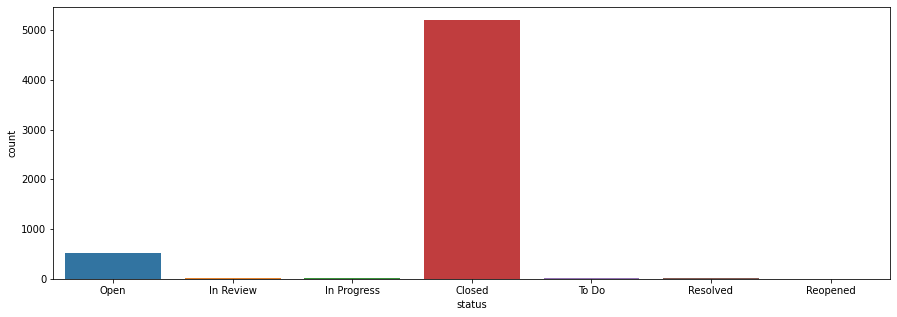

In [360]:
ax = sns.countplot(x="status", data=issues[["issue_id", "status"]])

### Edition

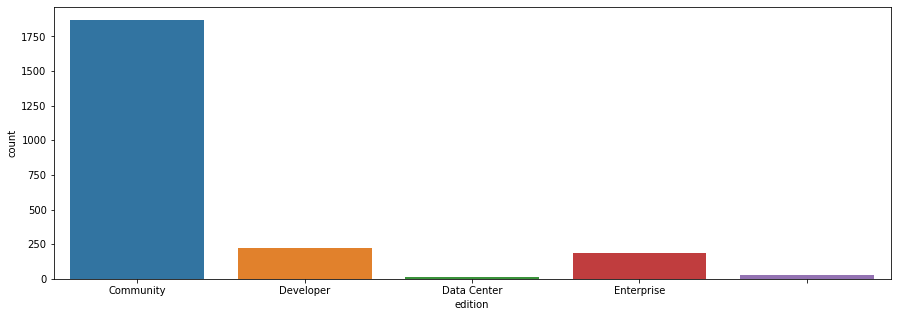

In [361]:
ax = sns.countplot(x="edition", data=issues)

In [362]:
issues.edition.describe()

count          2315
unique            5
top       Community
freq           1869
Name: edition, dtype: object

In [363]:
issues.edition.isna().sum()

3464

In [365]:
issues[(issues.edition.isna()) & (issues.resolution_name=="Fixed") & (issues.issuetype_name=="Bug")]

,status,issuetype_name,status_name,priority_name,lastViewed,votes,environment,votes_votes,issue_id,resolutiondate,resolution_name,duedate,priority_id,assignee,status_id,issue_key,summary,reporter,project,creator,issuetype_id,updated,assignee_name,creator_name,edition,created,description,reporter_name,created_month,created_year
1537,Closed,Bug,Closed,Major,NaT,0,NaN,0,79313,2018-12-03 17:05:12+00:00,Fixed,2018-12-10 00:00:00+00:00,3,Janos Gyerik,6,SONAR-11537,Fix intermittent failures to create Check Run ...,Janos Gyerik,SONAR,Janos Gyerik,1,2018-12-17 16:42:19+00:00,janos.gyerik,janos.gyerik,NaN,2018-11-27 14:36:47+00:00,"Sometimes, Check Run is not created at the end...",janos.gyerik,11,2018
1682,Closed,Bug,Closed,Major,NaT,0,NaN,0,76901,2018-09-24 09:26:19+00:00,Fixed,2018-09-28 00:00:00+00:00,3,Fabrice Bellingard,6,SONAR-11300,Coupons with periods larger than 1 year have a...,Jean-Baptiste Lievremont,SONAR,Jean-Baptiste Lievremont,1,2018-11-19 20:05:22+00:00,fabrice.bellingard,jeanbaptiste.lievremont,NaN,2018-09-21 12:10:27+00:00,When the duration of a SonarCloud coupon excee...,jeanbaptiste.lievremont,9,2018
1693,Closed,Bug,Closed,Major,NaT,0,NaN,0,76792,2018-10-11 16:07:18+00:00,Fixed,2018-10-17 00:00:00+00:00,3,Sebastien Lesaint,6,SONAR-11280,PostProjectAnalysisTasks API fails when consum...,Sebastien Lesaint,SONAR,Sebastien Lesaint,1,2018-10-11 16:09:12+00:00,sebastien.lesaint,sebastien.lesaint,NaN,2018-09-18 15:09:28+00:00,"If a Billing exception is raised on a PR, the ...",sebastien.lesaint,9,2018
1699,Closed,Bug,Closed,Major,NaT,0,NaN,0,76729,2018-10-11 09:16:06+00:00,Fixed,2018-10-16 00:00:00+00:00,3,Janos Gyerik,6,SONAR-11269,Fail to automatically create project from an e...,Julien Lancelot,SONAR,Julien Lancelot,1,2018-10-11 09:16:06+00:00,janos.gyerik,julien.lancelot,NaN,2018-09-17 08:24:45+00:00,Here's the error when trying to automatically ...,julien.lancelot,9,2018
1701,Closed,Bug,Closed,Major,NaT,0,NaN,0,76715,2018-10-11 08:45:10+00:00,Fixed,2018-10-17 00:00:00+00:00,3,Stas Vilchik,6,SONAR-11267,Missing localization message when selecting ma...,Julien Lancelot,SONAR,Julien Lancelot,1,2018-10-11 08:45:10+00:00,stas.vilchik,julien.lancelot,NaN,2018-09-14 15:29:41+00:00,"When selecting marketing badge, instead of dis...",julien.lancelot,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,Closed,Bug,Closed,Major,NaT,0,NaN,0,27726,2015-09-25 09:54:07+00:00,Fixed,2015-09-25 00:00:00+00:00,3,Julien Lancelot,6,SONAR-6347,Increase max value of duplications_index id co...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-02-01 15:07:36+00:00,julien.lancelot,henryju,NaN,2015-03-27 02:55:20+00:00,When an instance contains too much data the cr...,henryju,3,2015
5765,Closed,Bug,Closed,Major,NaT,0,NaN,0,27863,2015-03-30 04:52:32+00:00,Fixed,2015-04-01 00:00:00+00:00,3,OLD - Teryk Bellahsene,6,SONAR-6340,Cancel report processing when several reports ...,OLD - Teryk Bellahsene,SONAR,OLD - Teryk Bellahsene,1,2015-04-01 02:45:43+00:00,bteryk,bteryk,NaN,2015-03-25 09:36:28+00:00,When 2 reports for the same project are in the...,bteryk,3,2015
5769,Closed,Bug,Closed,Major,NaT,2,NaN,2,27851,2016-05-16 10:34:07+00:00,Fixed,2016-05-16 00:00:00+00:00,3,Stas Vilchik,6,SONAR-6336,Incorrect quality status when multiple conditi...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2016-05-17 08:04:51+00:00,stas.vilchik,henryju,NaN,2015-03-24 10:44:52+00:00,If several conditions are declared on the same...,henryju,3,2015
5770,Closed,Bug,Closed,Major,NaT,0,NaN,0,29701,2015-03-24 08:00:46+00:00,Fixed,2015-03-31 00:00:00+00:00,3,OLD - Julien HENRY,6,SONAR-6335,Wrong line checksum on blank lines after migra...,OLD - Julien HENRY,SONAR,OLD - Julien HENRY,1,2018-11-08 21:00:18+00:00,henryju,henryju,NaN,2015-03-24 05:21:51+00:00,The FileSource migration is buggy and generate...,henryju,3,2015


### Further analysis
* Time between issue reported and closed
* Number of subtasks per issue